# Assignment 1: Construction of VGG16 network{-}

This assignment aims at familiarizing you with training and testing the VGG16 neural network for an image classification task. You will go through the process of loading data, preprocessing images, building the VGG16 model, and evaluating its performance.

The assignment rqeuirements include:
- **1.1 (1 point)** Load the dataset.
- **1.2 (1 point)** Process, normalize, and resize the images.
- **1.3 (3 points)** Construct the vanilla VGG16 model, named VGG16-version1, from scratch by sequentially defining each layer to accomplish the image classification task.
- **1.4 (1 point)** Evaluate the performance of the VGG16-version1 model.
- **1.5 (2 points)** Enhance the VGG16 model by adding supplementary layers of your choice to boost the performance of VGG16-version1, now designated as VGG16-version2.
- **1.6 (2 points)** Evaluate the performance of the VGG16-version2 model. Provide comments and observations regarding the impact of these additions on the model’s effectiveness.

The dataset you will be working on is MNIST dataset. This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment1-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named DL4AI-\<StudentID>-Assignment1 (e.g., DL4AI-2012345-Assigment1) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have modeling steps other than the basic requirements and achieve an excellent model accuracy. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

### Reference {-}:
- Simonyan, K., and Zisserman, A. 2014b. Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556, https://arxiv.org/abs/1409.1556.

## VGG16 architecture

![alt text](VGG16-architecture-1.png)

![alt text](VGG16-architecture-2.png)

Some characteristics of the VGG16 architecture:
- Kernel size of all convolutional layers is 3x3.
- Numbers of filters of every block are sequentially 64, 128, 256, 512, 512 as in the figure.
- All activation functions are ReLUs, except the output layer which uses softmax.
- Dropout probability used after dense layers is 0.5.

In [7]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Load the MNIST dataset and split train/test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize data to the value range [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# Show shape of the training and test data
print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (60000, 28, 28), y_train = (60000,)
Test shape: X_test = (10000, 28, 28), y_test = (10000,)


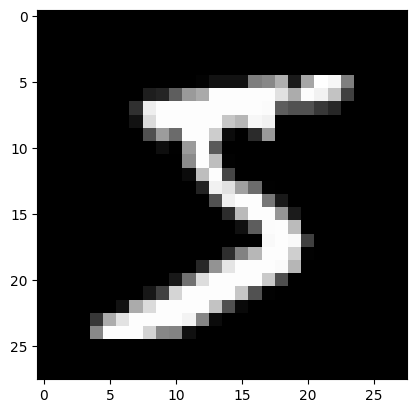

In [10]:
# Install OpenCV library to process images.
# !pip3 install opencv-python

# Show an image
plt.imshow(X_train[0,:,:], cmap='gray')
plt.show()

In [11]:
#split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train= "+ str(y_train.shape))
print("Val shape: X_val= "+ str(X_val.shape) + ",y_val = " + str(y_val.shape))
print("Test shape: X_test= " + str(X_test.shape)+ ",y_test= " + str(y_test.shape))


Train shape: X_train = (54000, 28, 28), y_train= (54000,)
Val shape: X_val= (6000, 28, 28),y_val = (6000,)
Test shape: X_test= (10000, 28, 28),y_test= (10000,)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

model = Sequential(name='VGG16')

#Block1
model.add(Conv2D(filters= 64, input_shape=(28,28,1), kernel_size=(3,3), strides=(1,1), padding ='same', name = 'Block_1a_Conv'))
model.add(Activation('relu'))
model.add(Conv2D(filters= 64, kernel_size=(3,3), strides=(1,1), padding ='same', name = 'Block_1b_Conv'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding ='same', name='Block_1_Maxpooling'))

#Block 2
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_2a_Conv'))
model.add(Activation('relu'))
model.add(Conv2D(filters= 128, kernel_size=(3,3), strides=(1,1), padding ='same', name = 'Block_2b_Conv'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding ='same', name = 'Block_2_Maxpooling'))

#block3

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_3a_Conv'))
model.add(Activation('relu'))

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_3b_Conv'))
model.add(Activation('relu'))

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_3c_Conv'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name = 'Block_3_Maxpooling'))

#block 4

model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_4a_Conv'))
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_4b_Conv'))
model.add(Activation('relu'))

model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_4c_Conv'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name = 'Block_4_Maxpooling'))

#block 5
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_5a_Conv'))
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_5b_Conv'))
model.add(Activation('relu'))

model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_5c_Conv'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name = 'Block_5_Maxpooling'))

#flatten:
model.add(Flatten())

#Fullly connected layer 1:
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(rate=0.4)) # Dropout with drop rate. This is to force the layer to learn general features.


#FC layer2
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(rate=0.4))

#FC layer3
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('softmax'))
# model.add(Dropout(rate=0.4))

model.summary()


Model: "VGG16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Block_1a_Conv (Conv2D)               │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_1b_Conv (Conv2D)               │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_1_Maxpooling (MaxPooling2D)    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_2a_Conv (Conv2D)               │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_2b_Conv (Conv2D)               │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_2_Maxpooling (MaxPooling2D)    │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_3a_Conv (Conv2D)               │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_3b_Conv (Conv2D)               │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_3c_Conv (Conv2D)               │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_3_Maxpooling (MaxPooling2D)    │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_4a_Conv (Conv2D)               │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_4b_Conv (Conv2D)               │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 37,713,480 (143.87 MB)

 Trainable params: 37,703,288 (143.83 MB)

 Non-trainable params: 10,192 (39.81 KB)

In [17]:
# Compile the model
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=5e-5), metrics=['accuracy']) # Define initial learning rate and metrics.

In [18]:
### Create a callback ModelCheckpoint: this callback will save a better version of model every time the optimizer finds one.
#### filepath: path to save the better model.
#### monitor: metrics to identify how a model is considered to be better.
#### mode='auto'/'max'/'min': to tell if the larger/smaller the metric, the better the model.
#### verbose: output log.
#### save_best_only: only save the best model instead off all better models along the training.

# Create a callback ModelCheckpoint. This callback will save the model when finding one better than the current best.
mc = keras.callbacks.ModelCheckpoint(filepath="epoch-{epoch:02d}.keras", # Path to save the model
                                     monitor='val_loss', # Metric to evaluate the model performance when looking for a better model.
                                     mode='min', # mode='auto'/'max'/'min': the  monitor should be max/min to be better.
                                                 # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
                                     verbose=0, # Inform every time a better model is found and saved.
                                     save_best_only=True) # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs

# Train the model. Using Colab for training
history = model.fit(X_train, y_train, # Data feature and data label
                    batch_size=512, # Batch size
                    epochs=10, # Number of training epochs
                    validation_data=(X_val, y_val), # Validation set
                    callbacks=[mc]) # Use callback ModelCheckpoint during the training



Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 93s 564ms/step - accuracy: 0.5756 - loss: 5.3561 - val_accuracy: 0.9740 - val_loss: 6.8244
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 30s 282ms/step - accuracy: 0.9803 - loss: 4.0273 - val_accuracy: 0.9815 - val_loss: 6.6586
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 38s 258ms/step - accuracy: 0.9880 - loss: 3.9473 - val_accuracy: 0.9843 - val_loss: 6.3278
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 40s 248ms/step - accuracy: 0.9790 - loss: 3.8982 - val_accuracy: 0.9892 - val_loss: 5.8342
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 46s 298ms/step - accuracy: 0.9529 - loss: 3.8615 - val_accuracy: 0.9897 - val_loss: 5.3515
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 34s 236ms/step - accuracy: 0.9809 - loss: 3.8290 - val_accuracy: 0.9920 - val_loss: 4.7710
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 42s 250ms/step - accuracy: 0.9930 - loss: 3.7955 - val_accuracy: 0.9912 - val_loss: 4.3229
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 48s 319ms/step - accuracy: 0.9965 - loss: 3

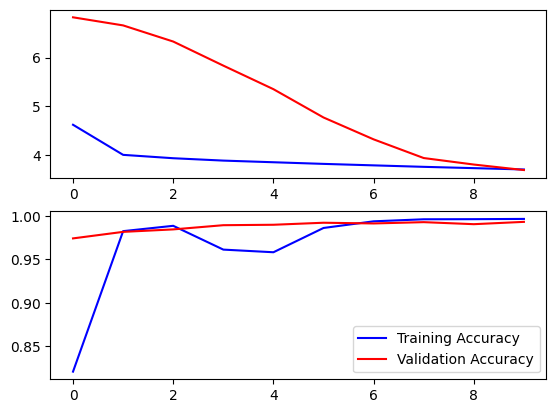

In [19]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1)

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [22]:
# Let us load a saved model and evaluate its performance on the test set
model1 = tf.keras.models.load_model("/content/epoch-10.keras")
result = model.evaluate(X_test, y_test) # If unspecified, batch_size will default to 32

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9911 - loss: 3.7228


In [23]:
# Show the model performance
print(model.metrics_names) # result[0] is loss, result[1] is accuracy. The metrics are defined in AlexNet.complie(...)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0],result[1]))

['loss', 'compile_metrics']
Loss and accuracy on the test set: loss = 3.7085866928100586, accuracy = 0.9934999942779541


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D

model2 = Sequential(name='VGG16-version2')

# Block 1
model2.add(Conv2D(filters=64, input_shape=(28, 28, 1), kernel_size=(3, 3), padding='same', name='Block_1a_Conv'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', name='Block_1b_Conv'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='Block_1_Maxpooling'))

# Block 2
model2.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', name='Block_2a_Conv'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', name='Block_2b_Conv'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='Block_2_Maxpooling'))

# Block 3
model2.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', name='Block_3a_Conv'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', name='Block_3b_Conv'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', name='Block_3c_Conv'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='Block_3_Maxpooling'))

# Block 4
model2.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', name='Block_4a_Conv'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', name='Block_4b_Conv'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', name='Block_4c_Conv'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='Block_4_Maxpooling'))

# Block 5
model2.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', name='Block_5a_Conv'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', name='Block_5b_Conv'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', name='Block_5c_Conv'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='Block_5_Maxpooling'))

# Global Average Pooling
model2.add(GlobalAveragePooling2D())

# Fully Connected Layers
model2.add(Dense(4096, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4096, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1000, activation='softmax'))

model2.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "VGG16-version2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Block_1a_Conv (Conv2D)               │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_1b_Conv (Conv2D)               │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_1_Maxpooling (MaxPooling2D)    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_2a_Conv (Conv2D)               │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_2b_Conv (Conv2D)               │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_2_Maxpooling (MaxPooling2D)    │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_3a_Conv (Conv2D)               │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Block_3b_Conv (Conv2D)               │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 7, 7, 256)           │              

 Total params: 37,709,992 (143.85 MB)

 Trainable params: 37,701,544 (143.82 MB)

 Non-trainable params: 8,448 (33.00 KB)

In [4]:
# Compile the model
import tensorflow as tf

model2.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=5e-5), metrics=['accuracy']) # Define initial learning rate and metrics.

In [12]:
from tensorflow import keras

### Create a callback ModelCheckpoint: this callback will save a better version of model every time the optimizer finds one.
#### filepath: path to save the better model.
#### monitor: metrics to identify how a model is considered to be better.
#### mode='auto'/'max'/'min': to tell if the larger/smaller the metric, the better the model.
#### verbose: output log.
#### save_best_only: only save the best model instead off all better models along the training.

# Create a callback ModelCheckpoint. This callback will save the model when finding one better than the current best.
mc = keras.callbacks.ModelCheckpoint(filepath="epoch-meow-{epoch:02d}.keras", # Path to save the model
                                     monitor='val_loss', # Metric to evaluate the model performance when looking for a better model.
                                     mode='min', # mode='auto'/'max'/'min': the  monitor should be max/min to be better.
                                                 # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
                                     verbose=0, # Inform every time a better model is found and saved.
                                     save_best_only=True) # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs

# Train the model. Using Colab for training
history = model2.fit(X_train, y_train, # Data feature and data label
                    batch_size=512, # Batch size
                    epochs=10, # Number of training epochs
                    validation_data=(X_val, y_val), # Validation set
                    callbacks=[mc]) # Use callback ModelCheckpoint during the training



Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 100s 524ms/step - accuracy: 0.5148 - loss: 2.0060 - val_accuracy: 0.1080 - val_loss: 5.5317
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 89s 312ms/step - accuracy: 0.9812 - loss: 0.0633 - val_accuracy: 0.1080 - val_loss: 3.8701
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 29s 197ms/step - accuracy: 0.9958 - loss: 0.0159 - val_accuracy: 0.1080 - val_loss: 6.9456
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - accuracy: 0.9990 - loss: 0.0048 - val_accuracy: 0.1080 - val_loss: 7.2940
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 61s 392ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 0.3495 - val_loss: 2.8406
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 84s 413ms/step - accuracy: 0.9998 - loss: 0.0010 - val_accuracy: 0.9437 - val_loss: 0.1987
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 32s 304ms/step - accuracy: 1.0000 - loss: 4.3287e-04 - val_accuracy: 0.9813 - val_loss: 0.0743
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 36s 340ms/step - accuracy: 1.0000 - lo

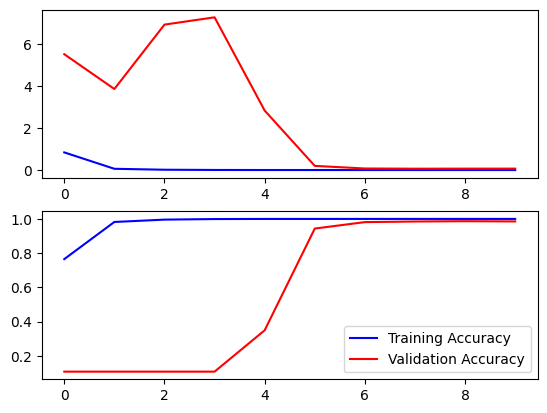

In [13]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1)

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [20]:
# Let us load a saved model and evaluate its performance on the test set
modelver2 = tf.keras.models.load_model("/content/epoch-meow-08.keras")
result = model2.evaluate(X_test, y_test) # If unspecified, batch_size will default to 32

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9806 - loss: 0.0790


In [21]:
# Show the model performance
print(model2.metrics_names) # result[0] is loss, result[1] is accuracy. The metrics are defined in AlexNet.complie(...)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0],result[1]))

['loss', 'compile_metrics']
Loss and accuracy on the test set: loss = 0.05976114049553871, accuracy = 0.9854999780654907


Evaluation:
Model 1 shows high accuracy but also a high loss, which can indicate overfitting or that the model is making predictions that are not consistent in terms of loss. High accuracy with high loss is often a sign that the model might have memorized the training set but struggles with generalization.
Model 2 has a significantly lower loss, indicating it is better at making predictions that align with the true labels, even though its accuracy is slightly lower. This could suggest that it has better generalization capabilities.

In case we want to minimize loss, Model 2 is the better choice due to its significantly lower loss value, indicating it is making more reliable predictions.

